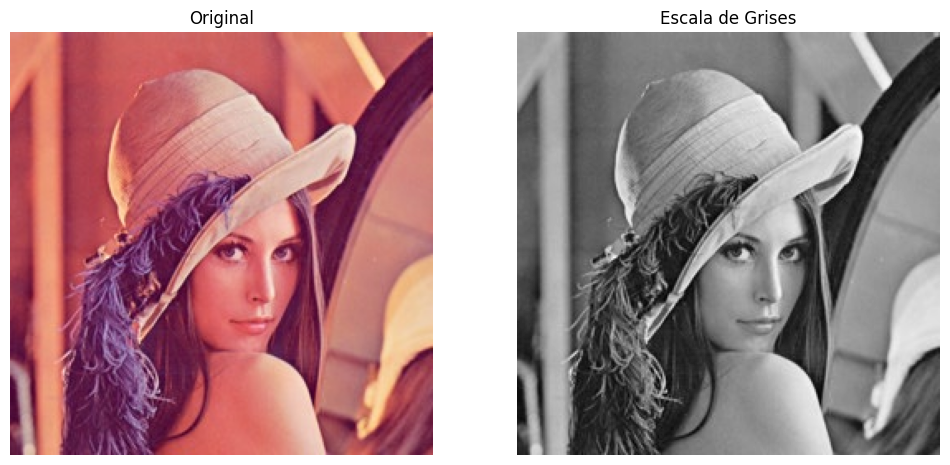

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# leer la imagen de Lenna original
imagen_original = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/lenna.jpg")
# Convertir la imagen de Lenna original a escala de grises. Ésta será nuestra g(x,y)
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')
         
plt.show()

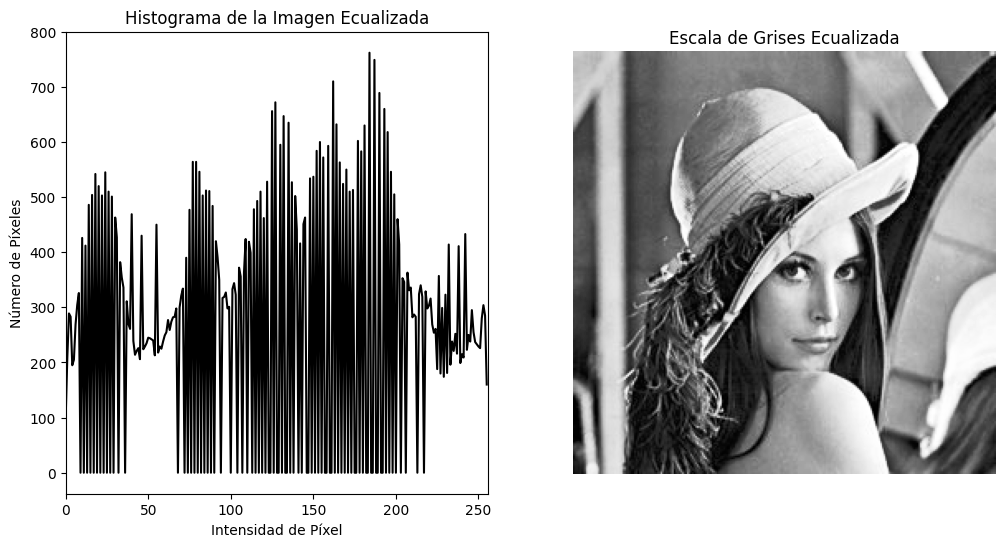

In [3]:
# Realizamos la ecualización de g(x,y) para normalizar la intensidad de colores
imagen_gris_ecualizada = cv2.equalizeHist(imagen_gris)

# Calcular el histograma de g(x,y)
histograma_ecualizado = cv2.calcHist([imagen_gris_ecualizada], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_ecualizado, color='black')
plt.title("Histograma de la Imagen Ecualizada")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen ecualizada en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris_ecualizada, cmap="gray")
plt.title("Escala de Grises Ecualizada")
plt.axis('off')

plt.show()

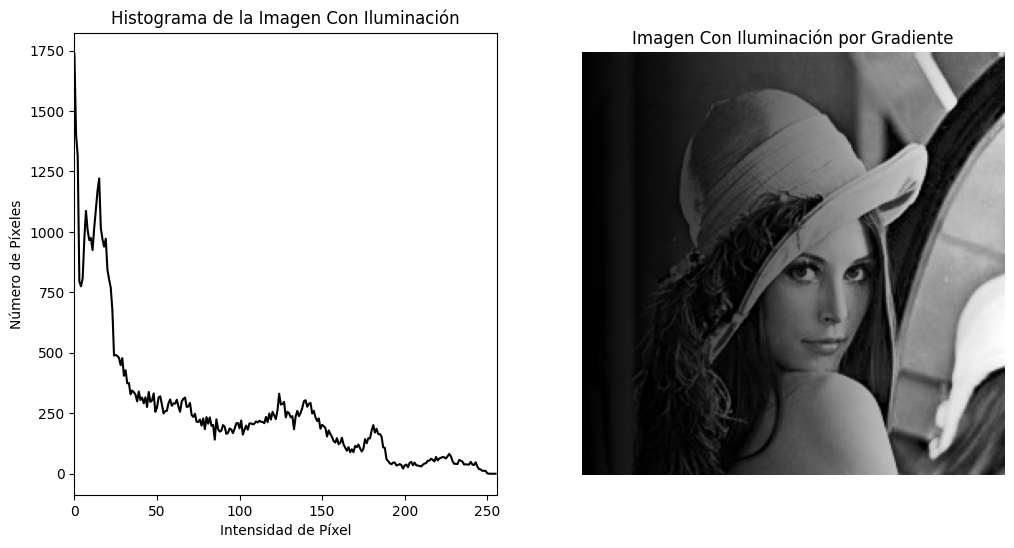

In [4]:
# Agregamos el factor de iluminación a g(x,y) por medio de un gradiente
def generar_sombreado(imagen_gris_ecualizada):
    filas, columnas = imagen_gris_ecualizada.shape[:2]
    sombreado = np.ones((filas, columnas), dtype=np.float32)
    # Crear un gradiente horizontal para simular el sombreado
    for i in range(columnas):
        sombreado[:, i] *= i / columnas
    return sombreado

# Generar y aplicar sombreado ficticio
sombreado = generar_sombreado(imagen_gris_ecualizada)
imagen_sombreada_ecualizada = cv2.multiply(imagen_gris_ecualizada.astype(np.float32), sombreado[:, :, np.newaxis])

# Calcular el histograma de g(x,y)
histograma_sombreado_ecualizado = cv2.calcHist([imagen_sombreada_ecualizada], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado_ecualizado, color='black')
plt.title("Histograma de la Imagen Con Iluminación")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen ecualizada en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_sombreada_ecualizada, cmap="gray")
plt.title("Imagen Con Iluminación por Gradiente")
plt.axis('off')

plt.show()

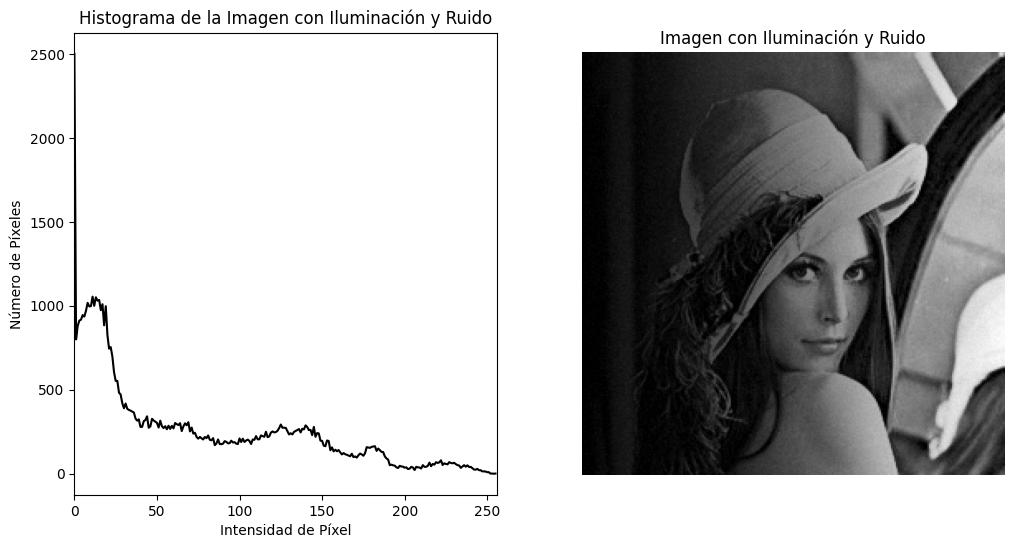

In [5]:
# Agregamos ruido gaussiano a la imagen generada con gradiente
def anadir_ruido_gaussiano(imagen_sombreada_ecualizada):
    filas, columnas = imagen_sombreada_ecualizada.shape

    # Generar el ruido gaussiano
    media = 0
    varianza = 10
    sigma = varianza ** 0.5

    # Crear una matriz de ruido gaussiano del mismo tamaño que la imagen
    ruido_gaussiano = np.random.normal(media, sigma, (filas, columnas)).reshape(filas, columnas)

    # Añadir el ruido a la imagen original
    imagen_con_ruido = cv2.add(imagen_sombreada_ecualizada.astype(np.float32), ruido_gaussiano.astype(np.float32))

    return imagen_con_ruido

# Se añade ruido a la imagen
imagen_con_ruido = anadir_ruido_gaussiano(imagen_sombreada_ecualizada)

# Convertir la imagen con ruido a un formato válido (uint8) y asegurar que los valores estén en el rango correcto
imagen_con_ruido = np.clip(imagen_con_ruido, 0, 255).astype(np.uint8)

# Calcular el histograma de g(x,y)
histograma_sombreado_ruido_ecualizado = cv2.calcHist([imagen_con_ruido], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado_ruido_ecualizado, color='black')
plt.title("Histograma de la Imagen con Iluminación y Ruido")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen ecualizada en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con Iluminación y Ruido")
plt.axis('off')

plt.show()

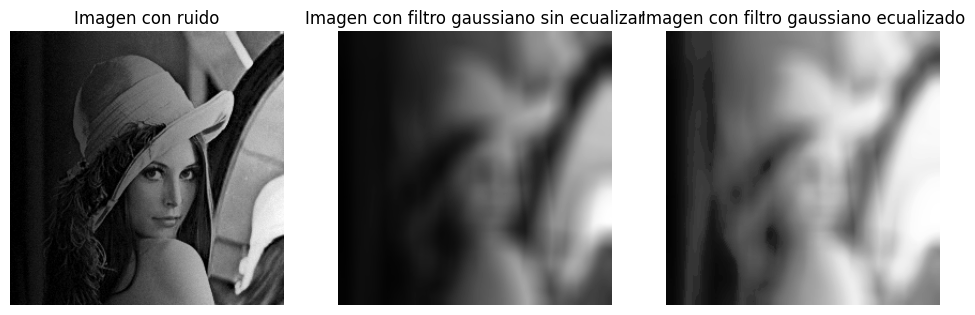

In [55]:
sigma = 128
size = 25

imagen_filtrada = cv2.GaussianBlur(imagen_con_ruido, (size, size), sigma)
imagen_filtrada_dos = cv2.equalizeHist(imagen_filtrada)

# Creamos una figura para contener ambas subtramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con ruido")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_filtrada, cmap="gray")
plt.title("Imagen con filtro gaussiano sin ecualizar")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_filtrada_dos, cmap="gray")
plt.title("Imagen con filtro gaussiano ecualizado")
plt.axis('off')

plt.show()

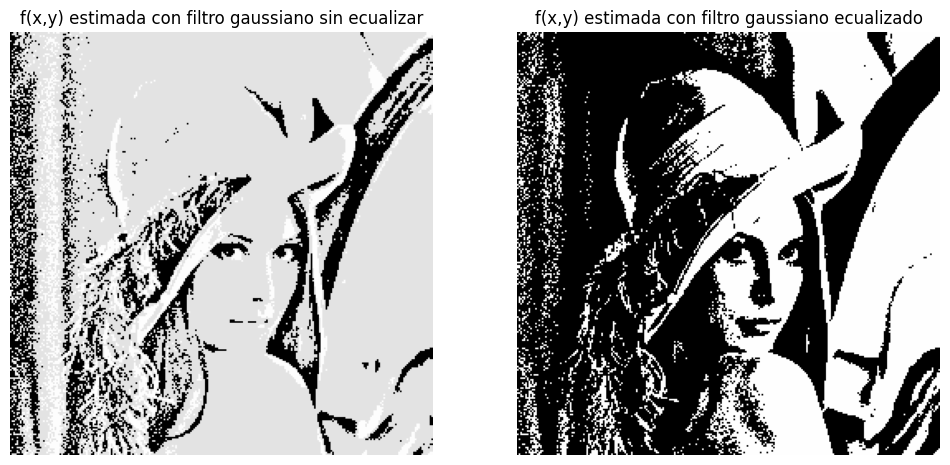

In [58]:
# Se realiza la divisón de g(x,y) entre la h(x,y) estimada para obtener la f(x,y) estimada

f_estimada = cv2.divide(imagen_con_ruido,imagen_filtrada)
resultado_normalizado = cv2.equalizeHist(f_estimada)

f_estimada_dos = cv2.divide(imagen_con_ruido,imagen_filtrada_dos)
resultado_normalizado_dos = cv2.equalizeHist(f_estimada_dos)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(resultado_normalizado, cmap="gray")
plt.title("f(x,y) estimada con filtro gaussiano sin ecualizar")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resultado_normalizado_dos, cmap="gray")
plt.title("f(x,y) estimada con filtro gaussiano ecualizado")
plt.axis('off')
         
plt.show()

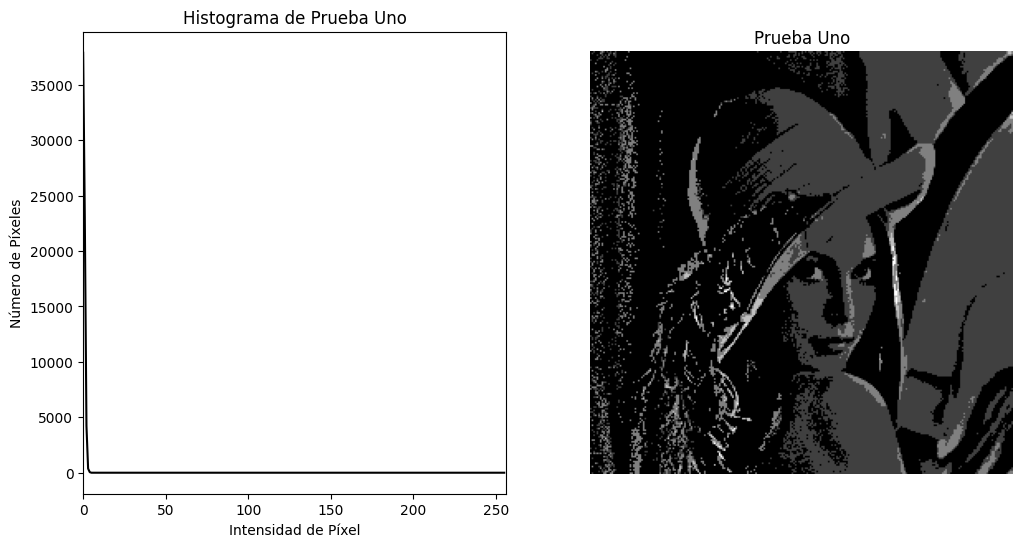

In [59]:
# Se realiza un experimento

prueba_uno = cv2.divide(f_estimada, f_estimada_dos)

# Calcular el histograma de prueba_uno
histograma_pruebaUno = cv2.calcHist([prueba_uno], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_pruebaUno, color='black')
plt.title("Histograma de Prueba Uno")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen ecualizada en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(prueba_uno, cmap="gray")
plt.title("Prueba Uno")
plt.axis('off')

plt.show()

In [60]:
# Se calcula RMSE entre g(x,y) y prueba_uno
if prueba_uno.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = prueba_uno.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre las imágenes es: {rmse}")

El RMSE entre las imágenes es: 132.28590393066406


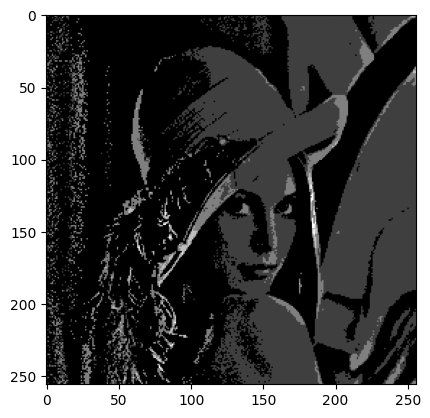

In [61]:
# Formula vista en clase el 01/03/2024

# Se calcula la media y desviación estandar de g(x,y)
media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_gris)

#print(f"Media g(x,y): {media_observada[0][0]}")
#print(f"Desviación estándar g(x,y): {desviacionEstandar_observada[0][0]} \n\n")

# Se calcula la media y desviación estandar de f(x,y) estimada
media_pruebaUno, desviacionEstandar_pruebaUno = cv2.meanStdDev(prueba_uno)

#print(f"Media f(x,y) estimada: {media_pruebaUno[0][0]}")
#print(f"Desviación f(x,y) estimada: {desviacionEstandar_pruebaUno[0][0]}")

f_dobleEstimada = ((prueba_uno - media_pruebaUno)) * desviacionEstandar_observada + media_observada

#print(f"F doble estimada es {f_dobleEstimada}")

plt.imshow(f_dobleEstimada, cmap = "gray")

In [62]:
# Se calcula RMSE entre g(x,y) y f_doble_estimada
if f_dobleEstimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre las imágenes es: {rmse}")

El RMSE entre las imágenes es: 38.01182556152344


El RMSE entre las imágenes es: 62.64539337158203


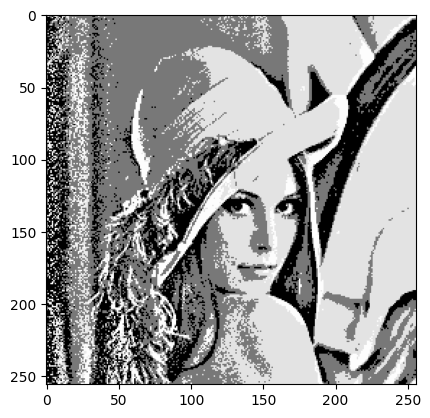

In [63]:
# Otra experimentación más

f_dobleEstimada_float = f_dobleEstimada.astype(np.float32)
f_estimada_float = f_estimada.astype(np.float32)
prueba_dos = cv2.multiply(f_dobleEstimada_float, f_estimada_float)

prueba_dos_norm = cv2.normalize(prueba_dos, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
prueba_dos_uint8 = np.uint8(prueba_dos_norm)
prueba_dos = cv2.equalizeHist(prueba_dos_uint8)

plt.imshow(prueba_dos, cmap = "gray")

# Se calcula RMSE entre g(x,y) y prueba_uno
if prueba_dos.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = prueba_dos.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre las imágenes es: {rmse}")

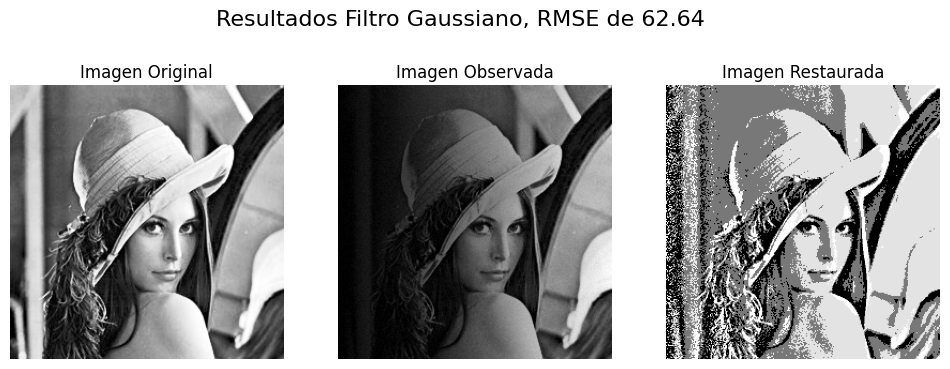

In [67]:
# Comparación de avances

plt.figure(figsize=(12, 6))

plt.suptitle("Resultados Filtro Gaussiano, RMSE de 62.64", fontsize=16, y=0.85)

plt.subplot(1, 3, 1)
plt.imshow(imagen_gris_ecualizada, cmap="gray")
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen Observada")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prueba_dos, cmap="gray")
plt.title("Imagen Restaurada")
plt.axis('off')

# Guardar gráfica
#plt.savefig("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/Resultados_FiltroGaussiano_Lenna.png", dpi=300, bbox_inches='tight')

plt.show()